# The Boston Housing Price Dataset

### To predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on. 

## Loading the Boston housing dataset

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [3]:
import pandas as pd
pd.DataFrame(train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets[:25]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5])

#### The prices are typically between 10,00 dollorr  and 50,000 dollor.

## Preparing the data

#### It would be problematic to feed into a neural network values that all take widely different ranges. A best practice to deal with such data is to do **Feature-wise normalization**.

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [8]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [9]:
test_data

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

## Building our network

### Few samples are available, we will use a very small network with two hidden layers, each with 64 units and experiment further with hidden layers and units.

- Less training data we have, the worse overfitting will be.
- Using small network is one way to mitigate overfitting.

In [10]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])
  return model

- we are compiling the network with the mse loss function (mean squared error).
- We are also monitoring metrics during training: mean absolute error (MAE).
- Here an MAE of 0.5 in this problem would mean our predictions are off by 500 dollor on average.

## Validating our approach using validation

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data)// k
num_epochs = 100
all_scores = []

In [12]:
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis = 0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis = 0)
  
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1, verbose=0)
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  all_scores.append(val_mae)

processing fold # 0
4/4 [==============================] - 0s 3ms/step - loss: 8.2382 - mean_absolute_error: 1.9583
processing fold # 1
4/4 [==============================] - 0s 3ms/step - loss: 9.9646 - mean_absolute_error: 2.4006
processing fold # 2
4/4 [==============================] - 0s 3ms/step - loss: 16.1792 - mean_absolute_error: 2.6332
processing fold # 3
4/4 [==============================] - 0s 3ms/step - loss: 11.5157 - mean_absolute_error: 2.2716


In [13]:
all_scores

[1.9583079814910889, 2.400557041168213, 2.6332149505615234, 2.271649122238159]

In [14]:
np.mean(all_scores)

2.315932273864746

### Savig the validation logs at each fold

In [15]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
       axis = 0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
       axis = 0)
  
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=1, verbose=1)
  
  mae_history = history.history['val_mean_absolute_error']   

  all_mae_histories.append(mae_history)

processing fold # 0
Epoch 1/500
303/303 [==============================] - 1s 2ms/step - loss: 241.1041 - mean_absolute_error: 11.5279 - val_loss: 47.2697 - val_mean_absolute_error: 4.6539
Epoch 2/500
303/303 [==============================] - 1s 2ms/step - loss: 35.5213 - mean_absolute_error: 4.1210 - val_loss: 25.6038 - val_mean_absolute_error: 3.1482
Epoch 3/500
303/303 [==============================] - 1s 2ms/step - loss: 23.7731 - mean_absolute_error: 3.2726 - val_loss: 19.5760 - val_mean_absolute_error: 2.8433
Epoch 4/500
303/303 [==============================] - 0s 2ms/step - loss: 19.2563 - mean_absolute_error: 2.9616 - val_loss: 17.1000 - val_mean_absolute_error: 2.8637
Epoch 5/500
303/303 [==============================] - 1s 2ms/step - loss: 17.4589 - mean_absolute_error: 2.7396 - val_loss: 15.4884 - val_mean_absolute_error: 2.7509
Epoch 6/500
303/303 [==============================] - 0s 2ms/step - loss: 15.0893 - mean_absolute_error: 2.5869 - val_loss: 12.6144 - val_mean

In [16]:
len(all_mae_histories[0])

500

## Building the history of successive mean K-fold validation scores

In [17]:
average_mae_history = [
                       
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

In [18]:
len(average_mae_history)

500

In [19]:
max(average_mae_history)

4.420773088932037

## Plotting validation scores

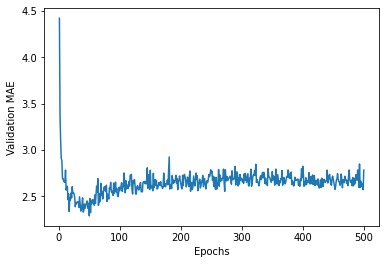

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### Difficult to see the plot, due to scalling issues and relatively high variance.
- We will omit the first 10 data points, which are on a different scale than the rest of the curve.
- Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

## Plotting validation scores, excluding the first 10 data points.

In [21]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point) 

  return smoothed_points

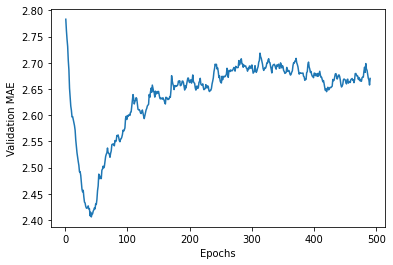

In [22]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

##### According to this plot, validation MAE stops improving significantly after 80 epochs.

## Training the final model

In [23]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
26/26 [==============================] - 1s 1ms/step - loss: 491.8570 - mean_absolute_error: 20.0282
Epoch 2/80
26/26 [==============================] - 0s 1ms/step - loss: 302.5772 - mean_absolute_error: 15.0195
Epoch 3/80
26/26 [==============================] - 0s 1ms/step - loss: 129.5675 - mean_absolute_error: 8.7890
Epoch 4/80
26/26 [==============================] - 0s 1ms/step - loss: 57.4945 - mean_absolute_error: 5.5195
Epoch 5/80
26/26 [==============================] - 0s 1ms/step - loss: 36.3981 - mean_absolute_error: 4.2860
Epoch 6/80
26/26 [==============================] - 0s 1ms/step - loss: 27.2526 - mean_absolute_error: 3.5833
Epoch 7/80
26/26 [==============================] - 0s 1ms/step - loss: 23.2665 - mean_absolute_error: 3.3732
Epoch 8/80
26/26 [==============================] - 0s 2ms/step - loss: 20.7540 - mean_absolute_error: 3.1303
Epoch 9/80
26/26 [==============================] - 0s 1ms/step - loss: 18.9440 - mean_absolute_error: 2.9746
Epoch

In [24]:
test_mae_score 

2.582157611846924

#### We are still off by about 2580 dollor.